In [157]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [158]:
word_index = imdb.get_word_index()
#word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(
     [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [159]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [160]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences), 10000))
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [161]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [162]:
x_train[0].shape

(10000,)

In [163]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [167]:
from keras import models
from keras import layers
from keras import regularizers
network= models.Sequential()

In [168]:
network.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(10000,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1,activation='sigmoid'))

In [169]:
#network.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')
network.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')

In [170]:
x_val= x_train[:10000]
x_train_partial=x_train[10000:]
y_val= y_train[:10000]
y_train_partial=y_train[10000:]


In [171]:
network_model=network.fit(x_train_partial,y_train_partial,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.6676 - acc: 0.6352 - val_loss: 0.5785 - val_acc: 0.8447
Epoch 2/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.5611 - acc: 0.7748 - val_loss: 0.4867 - val_acc: 0.8649
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.4946 - acc: 0.8290 - val_loss: 0.4357 - val_acc: 0.8758
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.4442 - acc: 0.8627 - val_loss: 0.4371 - val_acc: 0.8526
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.4027 - acc: 0.8880 - val_loss: 0.3689 - val_acc: 0.8835
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3644 - acc: 0.9059 - val_loss: 0.3624 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3377 - acc: 0.9138 - val_loss: 0.3492 - 

In [172]:
network_history=network_model.history
network_history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [173]:
import matplotlib.pyplot as plt
loss_values = network_history['loss']
val_loss_values = network_history['val_loss']

In [174]:
epochs = range(1, len(val_loss_values) + 1)
epochs

range(1, 21)

<IPython.core.display.Javascript object>


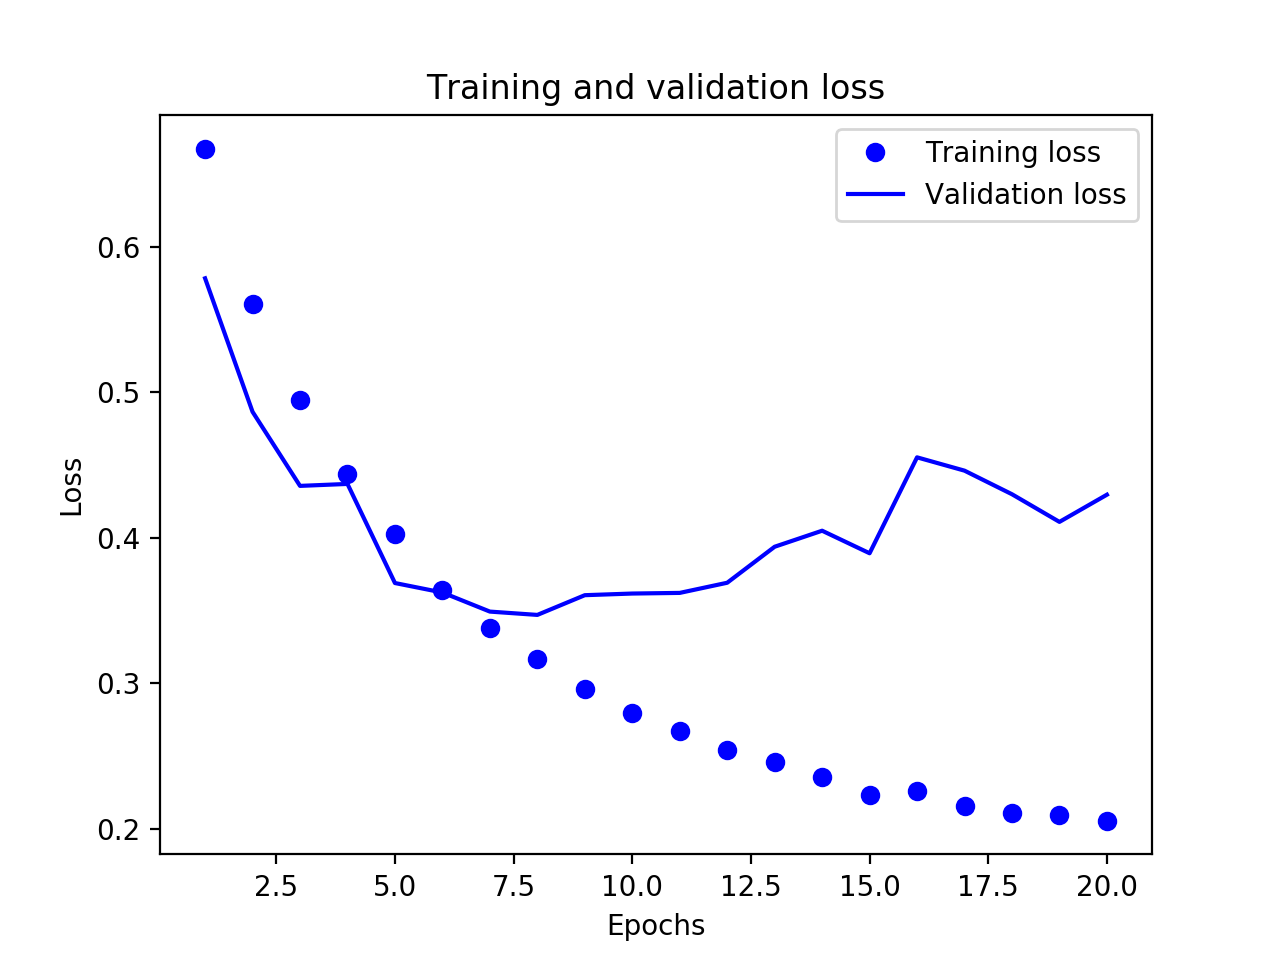

In [175]:
%matplotlib notebook

plt.figure()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<IPython.core.display.Javascript object>


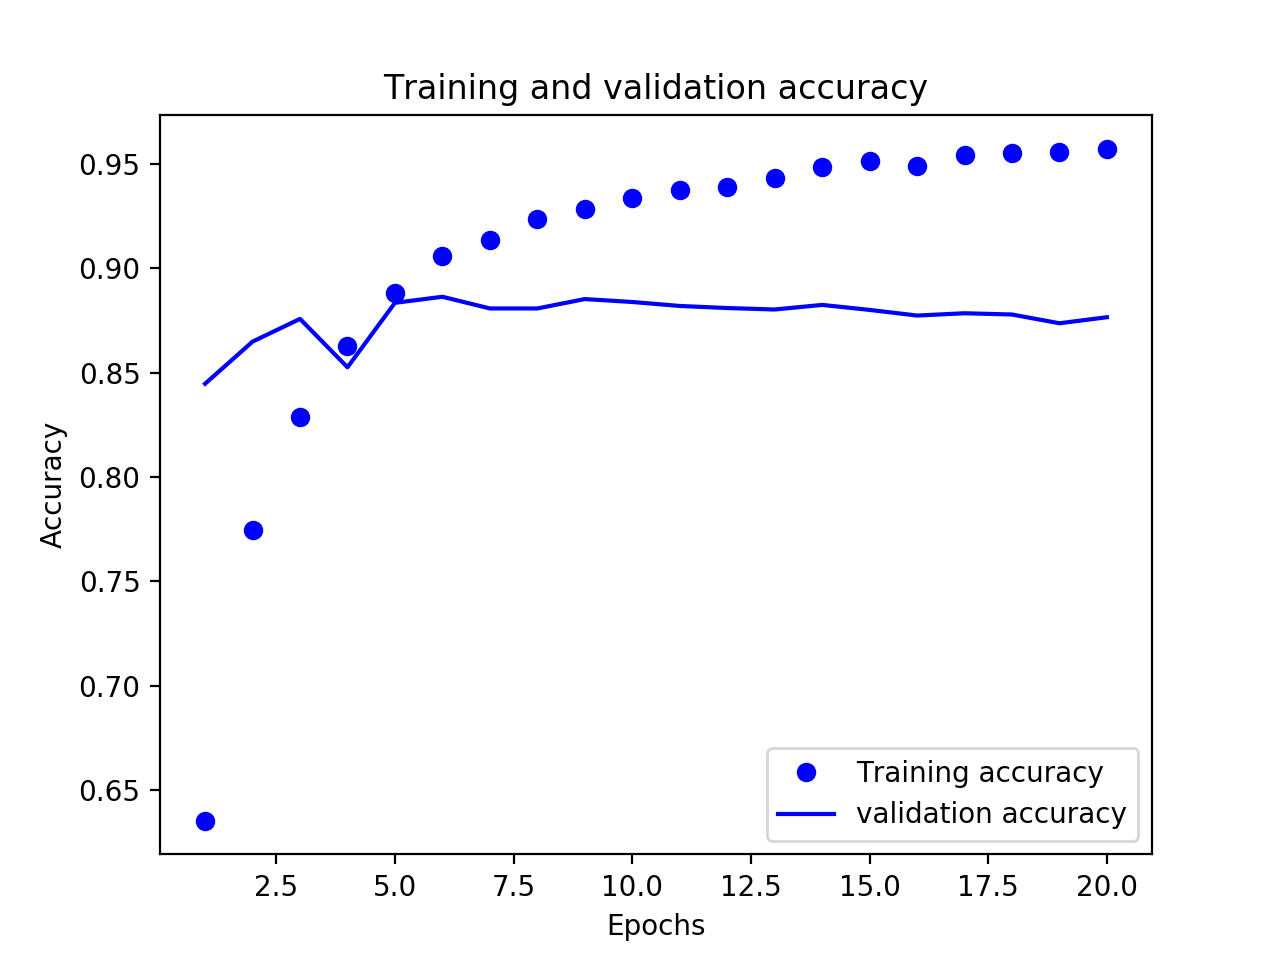

In [176]:
plt.figure()

acc_val= network_history['acc']
validation_acc_val= network_history['val_acc']
plt.plot(epochs, acc_val, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc_val, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()